## Weatherpy Homework

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import datetime
from pprint import pprint

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### General Cities List

In [4]:
## Generate cities list and dependencies setup

# List for holding lat_lngs and cities
lat_lng = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lng = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lng = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
# Build URL for API calls including cities and unit of measure

unit = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
url_ping = f"{url}appid={weather_key}&q={city}&units={unit}" 
response_json = requests.get(url_ping).json()
pprint(response_json)




{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': 42.6001, 'lon': -73.9662},
 'dt': 1667784940,
 'id': 5106841,
 'main': {'feels_like': 65.95,
          'humidity': 88,
          'pressure': 1019,
          'temp': 65.55,
          'temp_max': 68.72,
          'temp_min': 62.55},
 'name': 'Albany',
 'sys': {'country': 'US',
         'id': 2037353,
         'sunrise': 1667734553,
         'sunset': 1667770986,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 121, 'gust': 4, 'speed': 1.01}}


In [6]:
# Lists for results
lat = []
lon = []
city_found = []
temp = []
humidity = []
cloudiness = []
windspeed = []
date = []
country = []

# Counter for print list
count = 0

# for Loop to iterate through cities selected
for city in cities:
    print(f'Record found {count} | {city_found}')
    count += 1

    url_ping = f"{url}appid={weather_key}&q={city}&units={unit}" 
    response_json = requests.get(url_ping).json()

    # Create dictionary for data from API calls
    weather_data = {}

    # Exceptions for cities to skip
    try:        
        lat.append(response_json["coord"]["lat"])
        lon.append(response_json["coord"]["lon"])
        temp.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        windspeed.append(response_json["wind"]["speed"])
        date.append(response_json["dt"])
        country.append(response_json["sys"]["country"])
        city_found.append(response_json["name"])
        pprint(f'City Found: {city_found}')
    except:
        pprint(f'City NOT found: Skipping...')
        continue
print("-----------------------")
print("Data Complete")
print("------------------------")

Record found 0 | []
"City Found: ['Chui']"
Record found 1 | ['Chui']
"City Found: ['Chui', 'Ancud']"
Record found 2 | ['Chui', 'Ancud']
"City Found: ['Chui', 'Ancud', 'Sinnamary']"
Record found 3 | ['Chui', 'Ancud', 'Sinnamary']
"City Found: ['Chui', 'Ancud', 'Sinnamary', 'Puerto Quijarro']"
Record found 4 | ['Chui', 'Ancud', 'Sinnamary', 'Puerto Quijarro']
"City Found: ['Chui', 'Ancud', 'Sinnamary', 'Puerto Quijarro', 'Oga']"
Record found 5 | ['Chui', 'Ancud', 'Sinnamary', 'Puerto Quijarro', 'Oga']
("City Found: ['Chui', 'Ancud', 'Sinnamary', 'Puerto Quijarro', 'Oga', "
 "'Kruisfontein']")
Record found 6 | ['Chui', 'Ancud', 'Sinnamary', 'Puerto Quijarro', 'Oga', 'Kruisfontein']
("City Found: ['Chui', 'Ancud', 'Sinnamary', 'Puerto Quijarro', 'Oga', "
 "'Kruisfontein', 'Saskylakh']")
Record found 7 | ['Chui', 'Ancud', 'Sinnamary', 'Puerto Quijarro', 'Oga', 'Kruisfontein', 'Saskylakh']
("City Found: ['Chui', 'Ancud', 'Sinnamary', 'Puerto Quijarro', 'Oga', "
 "'Kruisfontein', 'Saskylakh',

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create data frame 
weather_data = pd.DataFrame({ "City": city_found,
                                "Country": country,
                                "Latitude": lat,
                                "Longitude": lon,
                                "Max Temperature (F)": temp,
                                "Humidity": humidity,
                                "Cloudiness": cloudiness,
                                "Windspeed (mph)": windspeed,
                                "Date": date
                                })
weather_data


City Country  Latitude  Longitude  Max Temperature (F)  \
0               Chui      UY  -33.6971   -53.4616                58.21   
1              Ancud      CL  -41.8697   -73.8203                48.90   
2          Sinnamary      GF    5.3833   -52.9500                77.79   
3    Puerto Quijarro      BO  -17.7833   -57.7667                74.14   
4                Oga      IT   46.4631    10.3470                35.02   
..               ...     ...       ...        ...                  ...   
563             Kaka      TM   37.3482    59.6143                50.68   
564       Shitanjing      CN   39.2342   106.3439                39.69   
565       Alexandria      EG   31.2156    29.9553                57.74   
566            Lagos      NG    6.5833     3.7500                80.92   
567             Raja      SS    8.4596    25.6780                73.26   

     Humidity  Cloudiness  Windspeed (mph)        Date  
0          87           0             9.33  1667785416  
1          87           9             3.51  1667785416  
2          87         100             7.18  1667785416  
3          32           0             3.67  1667785417  
4          56          40             2.46  1667785417  
..        ...         ...              ...         ...  
563        82         100             7.92  1667785620  
564        35           0             7.43  1667785621  
565        43           0            10.27  1667785481  
566        89          34             2.39  1667785451  
567        54          97             3.27  1667785621  

[568 rows x 9 columns]

In [8]:
# Output File (CSV)
weather_output_file = "weather_data.csv"
weather_data.to_csv(weather_output_file, header=True)

In [9]:
# Create and display summary of dataframe
summary_weather = weather_data.describe()
summary_weather

Latitude   Longitude  Max Temperature (F)    Humidity  Cloudiness  \
count  568.000000  568.000000           568.000000  568.000000  568.000000   
mean    20.886870   19.123461            56.333169   73.591549   54.109155   
std     33.036133   92.361449            23.337476   19.627808   40.204224   
min    -54.800000 -175.200000           -23.760000    7.000000    0.000000   
25%     -6.323700  -66.422250            42.765000   61.000000   10.000000   
50%     26.563150   25.983350            63.210000   79.000000   58.500000   
75%     46.733700  101.726275            74.662500   89.000000   99.000000   
max     78.218600  179.316700            94.980000  100.000000  100.000000   

       Windspeed (mph)          Date  
count       568.000000  5.680000e+02  
mean          7.245405  1.667786e+09  
std           5.317460  8.200099e+01  
min           0.000000  1.667785e+09  
25%           3.360000  1.667785e+09  
50%           5.970000  1.667786e+09  
75%           9.962500  1.667786e+09  
max          30.380000  1.667786e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%. 
count = 0
humidity_high = []

# Find indices with hummidity > 100%
for value in weather_data["Humidity"]:
    if value > 100 == True:
        humidity_high.appent(count)
        count += 1
    else:
        count += 1

# Indicies to drop
if humidity_high == []:
    print("No cities with humidity > 100%")
else:
    print(f'Drop indices {humidity_high}')

No cities with humidity > 100%


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs Temperature Plot

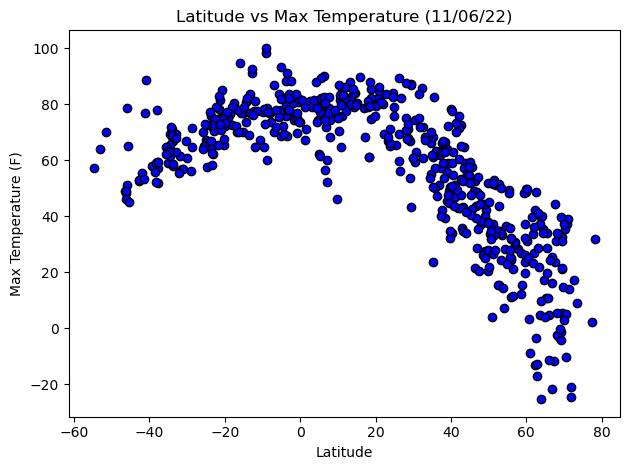

In [46]:
# Latitude vs temp scatter plot
x_values = weather_data["Latitude"]
y_values = weather_data["Max Temperature (F)"]
plt.scatter(x_values, y_values, color='blue', edgecolors='black')
plt.title("Latitude vs Max Temperature (11/06/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
plt.savefig("images\lat_vs_temp.png")
plt.show()


This scatter plot demonstrates the relationship between latitude and temperature for the cities included in the data frame "weather_data".  Latitudes = "0" are at the equator which correlates to higher temperatures.  As the latitude increases, moving away from the equator, the location's corresponding temperature decreases.

### Latitude vs. Humidity Plot

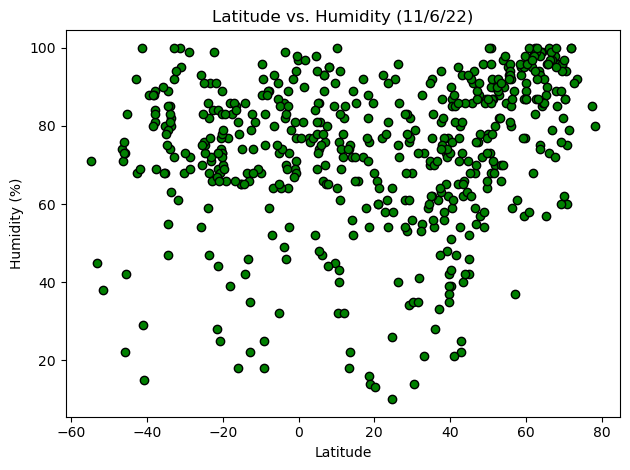

In [47]:
x_values = weather_data["Latitude"]
y_values = weather_data["Humidity"]
plt.scatter(x_values, y_values, color="green", edgecolors="black")
plt.title("Latitude vs. Humidity (11/6/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.savefig("images\lat_vs_humidity.png")
plt.show()

This scatter plot shows the relationship between latitude and humidity.  Humidity is also impacted by elevation of the location. As the plot demonstrates, there is a wide variation of humidity level for each location, not necessarily impacted by latitude, but more strongly correlated with each location's elevation.

#### Latitude vs Cloudiness Plot

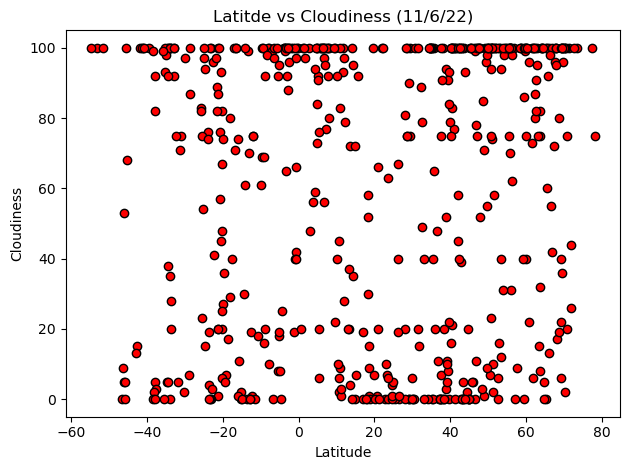

In [48]:
x_values = weather_data["Latitude"]
y_values = weather_data["Cloudiness"]
plt.scatter(x_values, y_values, color="red", edgecolors="black")
plt.title("Latitde vs Cloudiness (11/6/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.savefig("images\lat_vs_cloudiness.png")
plt.show()

The relationship between cloudiness and latitude shown in this plot reveals a wide variation in cloudiness for locations.  However, those locations -20 to 20 and 40-60 degrees of latitude do have a slightly higher tendency for increased clouds, depending on elevation of the location

#### Latitude vs Windspeed Plot

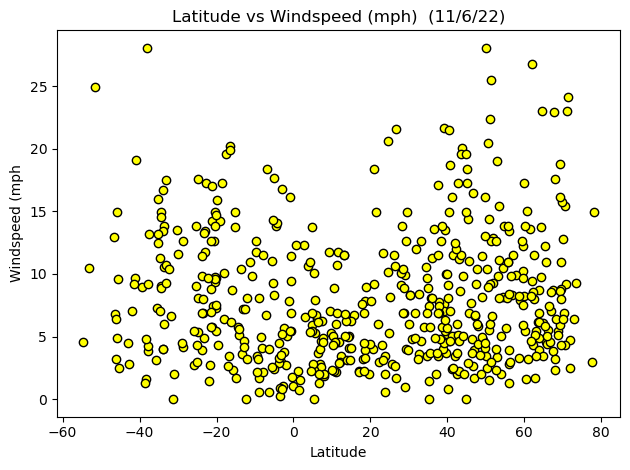

In [49]:
x_values = weather_data["Latitude"]
y_values = weather_data["Windspeed (mph)"]
plt.scatter(x_values, y_values, color="yellow", edgecolors="black")
plt.title("Latitude vs Windspeed (mph)  (11/6/22)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph")
plt.tight_layout()
plt.savefig("images\lat_vs_wind.png")
plt.show()

This plot shows the correlation between latitude and windspeed.  Most latitudes have lower wind speeds at this time of year, based on the current data.

## Linear Regressions

In [50]:
# Create bins for hemispheres
bins = [-90, -0.1, 90]

hemi_name = ["Southern Hemisphere", "Northern Hemisphere"]

weather_data["Hemisphere"] = pd.cut(weather_data["Latitude"], bins, labels=hemi_name, include_lowest=True)

# Filter by the bins
northern_df = weather_data[weather_data['Hemisphere']=="Northern Hemisphere"]
southern_df = weather_data[weather_data['Hemisphere']=="Southern Hemisphere"]

#### Northern Hemisphere: Max Temperature vs Latitude (Linear Regression)

The r-value is: -0.8409405231014168


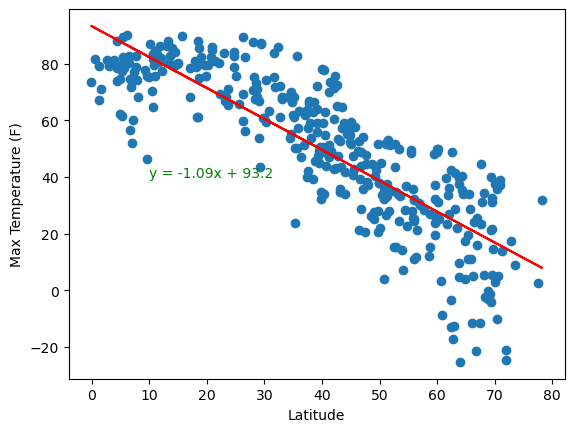

In [55]:
x_values = northern_df["Latitude"]
y_values = northern_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stdderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line, (10,40), color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f'The r-value is: {rvalue}')
plt.savefig("images/northern_maxtemp_vs_lat.png")
plt.show()

##### Southern Hemisphere: Max Temperature vs Latitude (Linear Regression)

The r-value is: 0.6789784901878791


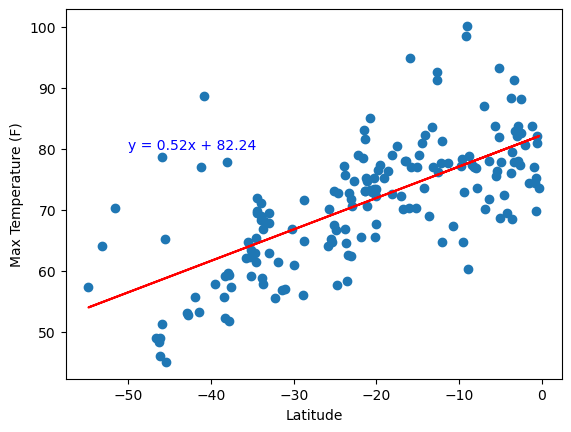

In [61]:
x_values = southern_df["Latitude"]
y_values = southern_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stdderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,80), fontsize=10, color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f'The r-value is: {rvalue}')
plt.savefig("images\southern_maxtemp_vs_lat.png")
plt.show()

#### Northern Hemisphere: Latitude vs Humidity (%) (Linear Regression)

The r-value is: 0.32385390548797366


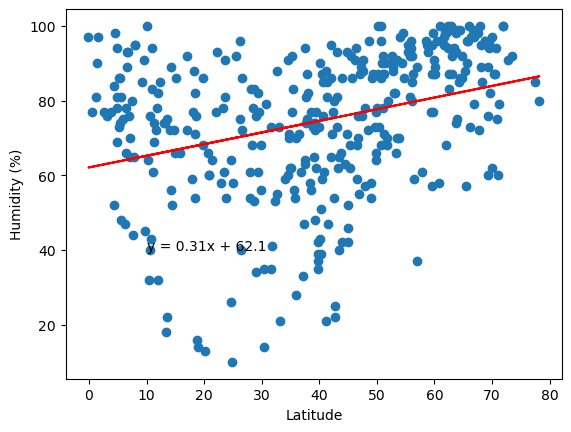

In [64]:
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stdderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line, (10,40), color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f'The r-value is: {rvalue}')
plt.savefig("images/northern_lat_humidity.png")
plt.show()

#### Southern Hemisphere: Latitude vs Humidity (Linear Regression)

The r-value is: 0.026867064449016206


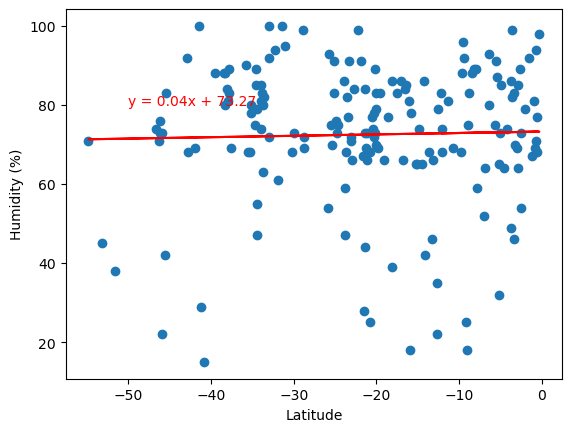

In [66]:
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stdderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,80), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f'The r-value is: {rvalue}')
plt.savefig("images\southern_lat_humidity.png")
plt.show()

#### Northern Hemisphere: Cloudiness vs Latitude (Linear Regression)

The r-value is: 0.13873137216522785


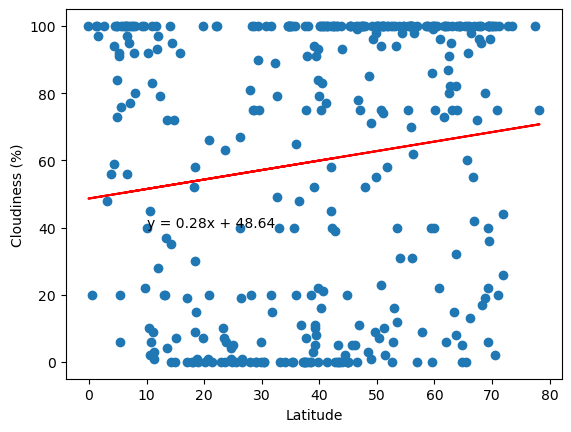

In [68]:
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stdderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line, (10,40), color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f'The r-value is: {rvalue}')
plt.savefig("images/northern_lat_cloudiness.png")
plt.show()

#### Southern Hemisphere: Latitude vs Cloudiness (Linear Regression)

The r-value is: 0.07759029644415409


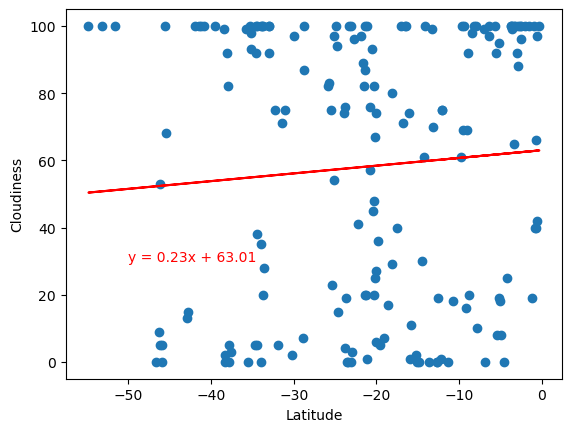

In [76]:
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stdderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,30), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is: {rvalue}')
plt.savefig("images\southern_lat_cloudiness.png")
plt.show()

#### Northern Hemisphere: Latitude vs Windspeed (Linear Regression)

The r-value is: 0.24395899007227836


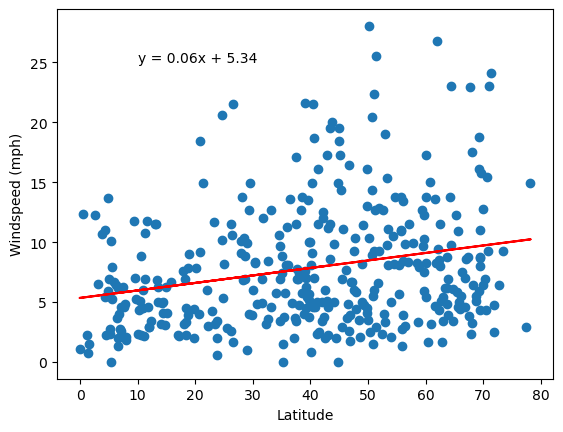

In [71]:
x_values = northern_df["Latitude"]
y_values = northern_df['Windspeed (mph)']
(slope, intercept, rvalue, pvalue, stdderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line, (10,25), color="black")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
print(f'The r-value is: {rvalue}')
plt.savefig("images/northern_lat_wind.png")
plt.show()

#### Southern Hemisphere: Latitude vs Windspeed (Linear Regression)

The r-value is: -0.18570641566673846


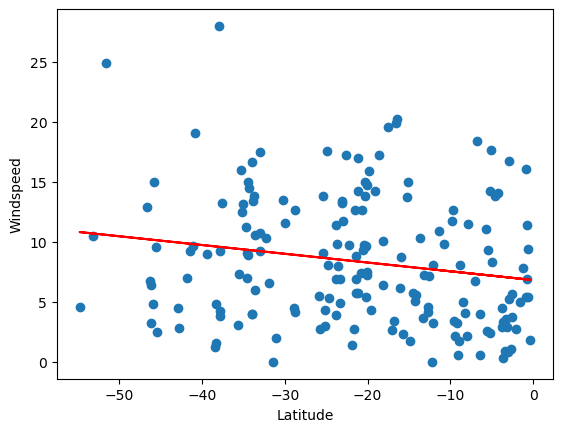

In [75]:

x_values = southern_df["Latitude"]
y_values = southern_df["Windspeed (mph)"]
(slope, intercept, rvalue, pvalue, stdderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line, (-40,80), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f'The r-value is: {rvalue}')
plt.savefig("images\southern_lat_windspeed.png")
plt.show()